In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.metrics import root_mean_squared_error
from reservoirpy.datasets import mackey_glass
import pandas as pd

In [2]:
# signal parameters
phase_shift = 0
duration = 650
sampling_rate = 1000
amplitude = 1
datasets = dict()

In [3]:
def generate_sine_wave(frequency, phase_shift, duration, sampling_rate, amplitude=1.0):
    """
    Generate a sine wave with specified parameters.

    Parameters:
    - frequency: Frequency of the sine wave in Hz
    - phase_shift: Phase shift of the sine wave in radians
    - duration: Duration of the sine wave in seconds
    - sampling_rate: Sampling rate in Hz (samples per second)
    - amplitude: Amplitude of the sine wave (default: 1.0)

    Returns:
    - t: Time array
    - y: Sine wave values
    """
    # Create a time array from 0 to the specified duration
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    
    # Generate sine wave using the given parameters
    y = amplitude * np.sin(2 * np.pi * frequency * t + phase_shift)
    
    return t, y


In [4]:
sine_dataset = []
for frequency in np.linspace(start=3,stop=23, num = 50):
    t, y = generate_sine_wave(frequency, phase_shift, duration, sampling_rate, amplitude)
    sine_dataset.append(y)
    
datasets["sine"] = sine_dataset

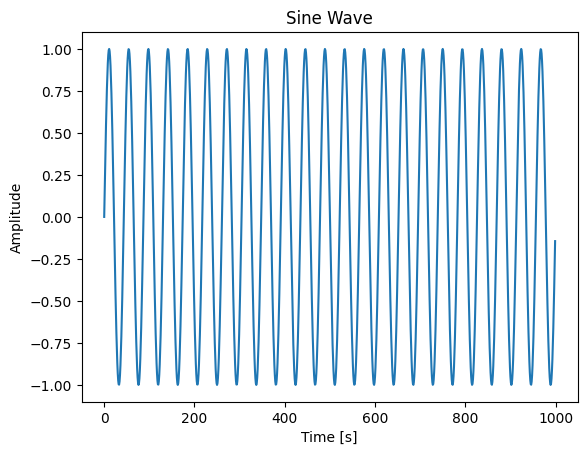

In [5]:
plt.plot(sine_dataset[49][:1000])
plt.title("Sine Wave")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [6]:
square_dataset = []
for frequency in np.linspace(start=3,stop=23, num = 50):
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    square_wave = signal.square(2 * np.pi * frequency * t)
    square_dataset.append(square_wave)
    
datasets['square'] = square_dataset

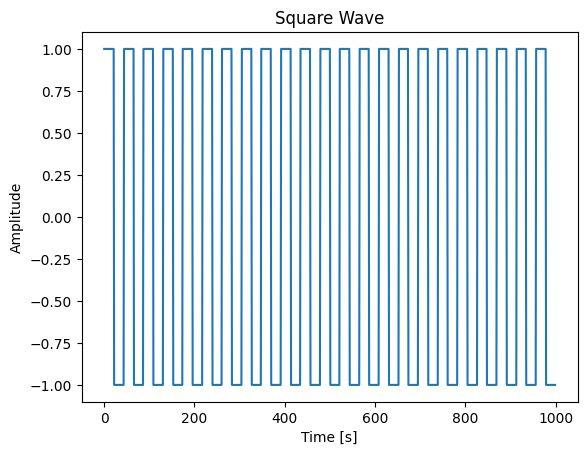

In [7]:
plt.plot(square_dataset[49][:1000])
plt.title("Square Wave")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [8]:
triangle_dataset = []
for frequency in np.linspace(start=3,stop=23, num = 50):
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    triangle_wave = signal.sawtooth(2 * np.pi * frequency * t, width=0.5)
    triangle_dataset.append(triangle_wave)
    
datasets['triangle'] = triangle_dataset

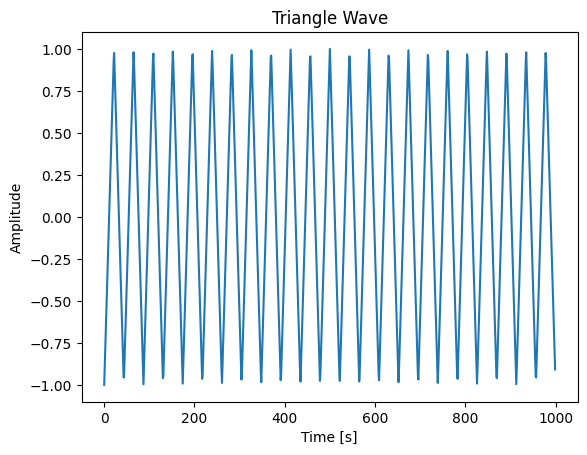

In [9]:
# Plot
plt.plot(triangle_dataset[49][:1000])
plt.title("Triangle Wave")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [10]:
sawtooth_dataset = []
for frequency in np.linspace(start=3,stop=23, num = 50):
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    sawtooth_wave = signal.sawtooth(2 * np.pi * frequency * t)
    sawtooth_dataset.append(sawtooth_wave)
    
datasets['sawtooth'] = sawtooth_dataset

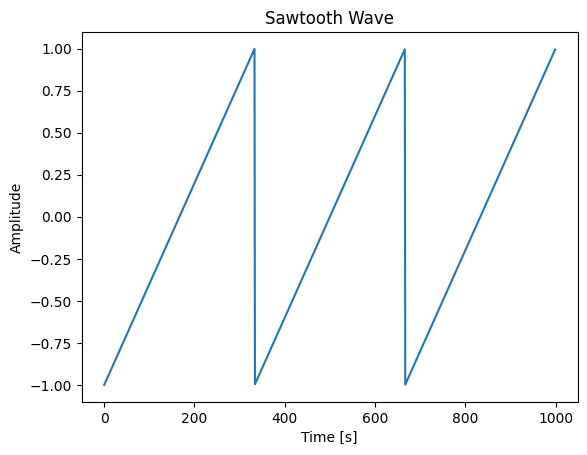

In [11]:
# Plot
plt.plot(sawtooth_dataset[0][:1000])
plt.title("Sawtooth Wave")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [12]:
import wfdb
from wfdb import processing

# Download a sample record from the MIT-BIH Arrhythmia Database
record_name = '100'
#wfdb.dl_database('mitdb', './mitdb')

# Read the ECG signal and annotation from the dataset
record = wfdb.rdrecord(f'./mitdb/{record_name}')
annotation = wfdb.rdann(f'./mitdb/{record_name}', 'atr')

# Extracting the signal (ECG data)
ecg_signal = record.p_signal

# Display some information
print(f"Signal shape: {ecg_signal.shape}")
print(f"Signal sampling rate: {record.fs} Hz")

Signal shape: (650000, 2)
Signal sampling rate: 360 Hz


In [13]:
ecg_dataset=[]
for i in range(100,235):
    record_name = str(i)
    #wfdb.dl_database('mitdb', './mitdb')

    print(i)
    try:
        # Read the ECG signal and annotation from the dataset
        record = wfdb.rdrecord(f'./mitdb/{record_name}')
        annotation = wfdb.rdann(f'./mitdb/{record_name}', 'atr')

        # Extracting the signal (ECG data)
        ecg_signal = record.p_signal

        # Display some information
        print(f"Signal shape: {ecg_signal.shape}")
        print(f"Signal sampling rate: {record.fs} Hz")
        ecg_dataset.append(ecg_signal[:, 0])
        ecg_dataset.append(ecg_signal[:, 1])
    except:
        ...

100
Signal shape: (650000, 2)
Signal sampling rate: 360 Hz
101
Signal shape: (650000, 2)
Signal sampling rate: 360 Hz
102
Signal shape: (650000, 2)
Signal sampling rate: 360 Hz
103
Signal shape: (650000, 2)
Signal sampling rate: 360 Hz
104
Signal shape: (650000, 2)
Signal sampling rate: 360 Hz
105
Signal shape: (650000, 2)
Signal sampling rate: 360 Hz
106
Signal shape: (650000, 2)
Signal sampling rate: 360 Hz
107
Signal shape: (650000, 2)
Signal sampling rate: 360 Hz
108
Signal shape: (650000, 2)
Signal sampling rate: 360 Hz
109
Signal shape: (650000, 2)
Signal sampling rate: 360 Hz
110
111
Signal shape: (650000, 2)
Signal sampling rate: 360 Hz
112
Signal shape: (650000, 2)
Signal sampling rate: 360 Hz
113
Signal shape: (650000, 2)
Signal sampling rate: 360 Hz
114
Signal shape: (650000, 2)
Signal sampling rate: 360 Hz
115
Signal shape: (650000, 2)
Signal sampling rate: 360 Hz
116
Signal shape: (650000, 2)
Signal sampling rate: 360 Hz
117
Signal shape: (650000, 2)
Signal sampling rate: 

In [14]:
datasets['ecg'] = ecg_dataset

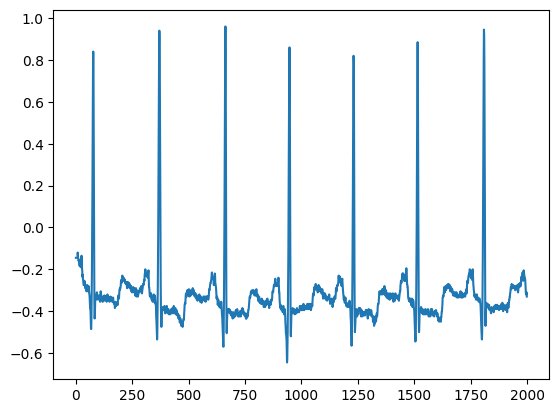

In [17]:
plt.plot(ecg_dataset[0][:2000])
plt.savefig('images/Reservoir_Dataset/ecg_example.png')
plt.savefig('images/Reservoir_Dataset/ecg_example.pdf')
plt.savefig('images/Reservoir_Dataset/ecg_example.svg')

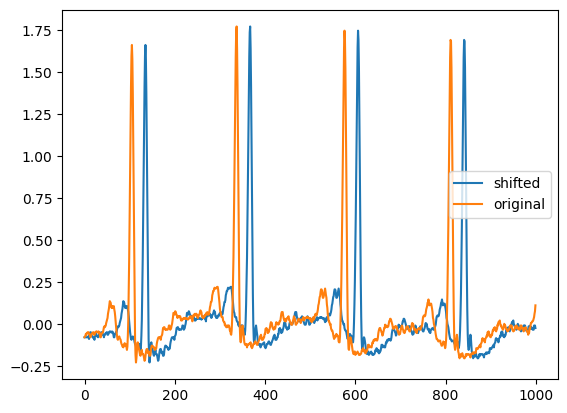

In [18]:
plt.plot(ecg_signal[:1000, 0], label="shifted")
shift = 30
plt.plot(ecg_signal[shift:1000+shift, 0],label="original")
plt.legend()
plt.savefig('images/Reservoir_Dataset/ecg_shifted.png')
plt.savefig('images/Reservoir_Dataset/ecg_shifted.pdf')
plt.savefig('images/Reservoir_Dataset/ecg_shifted.svg')

In [17]:
mackey_glass_dataset = [] 
n_timesteps = 650000
for tau in range(14,22):
    data = mackey_glass(n_timesteps=n_timesteps, tau=tau)
    mackey_glass_dataset.append(data)

In [18]:
datasets['mackey_glass'] = mackey_glass_dataset

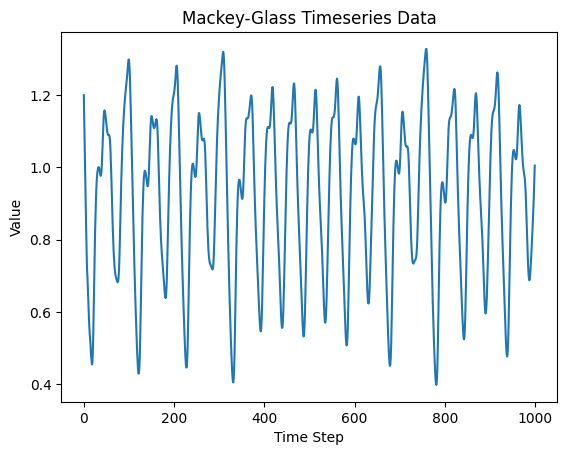

In [19]:
#data = mackey_glass(n_timesteps=1000, tau=17)
plt.plot(mackey_glass_dataset[17-14][:1000])
plt.title("Mackey-Glass Timeseries Data")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.show()

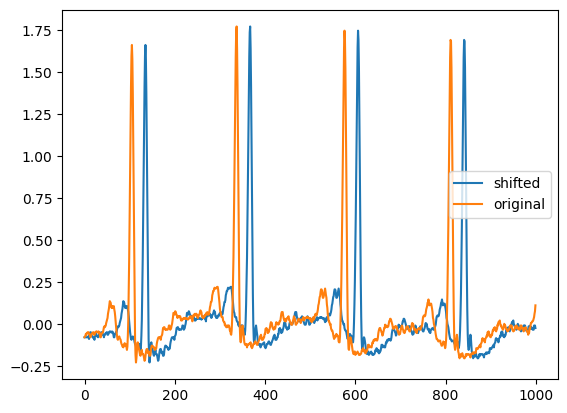

In [20]:
plt.plot(ecg_signal[:1000, 0], label="shifted")
shift = 30
plt.plot(ecg_signal[shift:1000+shift, 0],label="original")
plt.legend()
plt.show()

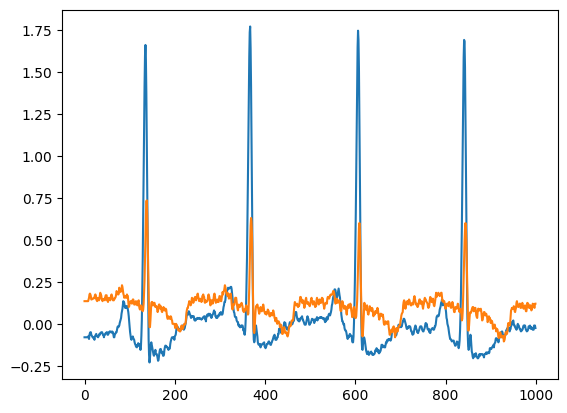

In [21]:
#plt.plot(get_signal(ecg_signal,0,10,window_size=1000, max_val=650000).flatten())
plt.plot(ecg_signal[:1000])
plt.show()

In [19]:
class EchoStateNetwork:
    def __init__(self, n_input, n_reservoir, n_output, spectral_radius=1.25, sparsity=0.1, alpha = 1, noise=0.001, random_state=None):
        """
        Initialize the Echo State Network.
        
        Parameters:
        - n_input: Number of input units.
        - n_reservoir: Number of reservoir neurons.
        - n_output: Number of output units.
        - spectral_radius: Scaling factor for the reservoir weights.
        - sparsity: Fraction of weights set to zero in the reservoir.
        - noise: Amount of noise to add to the reservoir dynamics.
        - random_state: Random seed for reproducibility.
        """
        # just for the random seed
        if random_state is not None:
            np.random.seed(random_state)
        
        self.n_input = n_input
        self.n_reservoir = n_reservoir
        self.n_output = n_output
        self.spectral_radius = spectral_radius
        # this number is used for making the sparsity
        self.sparsity = sparsity
        self.alpha = alpha
        
        # pbbly for the noise ammount
        self.noise = noise

        # Input weight matrix
        self.W_in = np.random.uniform(-1, 1, (n_reservoir, n_input + 1))  # +1 for bias term

        # Reservoir weight matrix (random sparse matrix)
        W_res = np.random.rand(n_reservoir, n_reservoir) - 0.5
        # ah ok so you 0 out every place that has more thant sparsity based on a normaly distributed matrix
        W_res[np.random.rand(*W_res.shape) > sparsity] = 0
        # Rescale to ensure the spectral radius
        rho_W = np.max(np.abs(np.linalg.eigvals(W_res)))
        self.W_res = W_res * (spectral_radius / rho_W)
        
        

        # Output weight matrix (initialized later)
        self.W_out = None
        
    def get_reservoir(self):
        return self.W_res
    
    def get_w_in(self):
        return self.W_in
    
    def set_reservoir(self, res):
        self.W_res = res
    
    def set_w_in(self,w_in):
        self.W_in = w_in

    def _update_reservoir(self, x, r):
        """
        Update the reservoir state.
        
        Parameters:
        - x: Current input.
        - r: Previous reservoir state.
        
        Returns:
        - Updated reservoir state.
        """
        input_with_bias = np.hstack([1.0, x])  # Add bias term to input
        # input_wiht_bias.shape == 1,self.n_input+1 
        # W_in.shape == self.n_reservoir, self.n_input+1
        # np.dot(self.W_in, input_with_bias).shape == self.n_reservoir
        # r_new.shape == self.n_reservoir
        r_new = np.tanh(np.dot(self.W_in, input_with_bias) + np.dot(self.W_res, r))# + self.noise * np.random.randn(self.n_reservoir))

        r_new = ( 1 - self.alpha ) * r + self.alpha * r_new
        return r_new

    def fit(self, X, y, ridge_reg=1e-6):
        """
        Train the output weights using ridge regression.
        
        Parameters:
        - X: Input data (n_samples, n_timesteps, n_features).
        - y: Target data (n_samples, n_timesteps, n_output).
        - ridge_reg: Regularization strength for ridge regression.
        """
        n_samples, n_timesteps, _ = X.shape
        
        # Initialize reservoir states
        reservoir_states = np.zeros((n_samples * n_timesteps, self.n_reservoir))

        # Collect reservoir states
        for i in range(n_samples):
            r = np.zeros(self.n_reservoir)  # Initial reservoir state
            for t in range(n_timesteps):
                r = self._update_reservoir(X[i, t], r)
                reservoir_states[i * n_timesteps + t] = r

        # Add bias term to reservoir states
        reservoir_states_with_bias = np.hstack([np.ones((reservoir_states.shape[0], 1)), reservoir_states])

        # Flatten target data
        target = y.reshape(-1, self.n_output)

        # Ridge regression to compute output weights
        self.W_out = np.dot(
            np.linalg.pinv(np.dot(reservoir_states_with_bias.T, reservoir_states_with_bias) + ridge_reg * np.eye(reservoir_states_with_bias.shape[1])),
            np.dot(reservoir_states_with_bias.T, target)
        )

    def predict(self, X):
        """
        Predict output for the given input data.
        
        Parameters:
        - X: Input data (n_samples, n_timesteps, n_features).
        
        Returns:
        - Predicted output (n_samples, n_timesteps, n_output).
        """
        n_samples, n_timesteps, _ = X.shape
        predictions = np.zeros((n_samples, n_timesteps, self.n_output))

        for i in range(n_samples):
            r = np.zeros(self.n_reservoir)  # Initial reservoir state
            for t in range(n_timesteps):
                r = self._update_reservoir(X[i, t], r)
                input_with_bias = np.hstack([1.0, r])  # Add bias term
                predictions[i, t] = np.dot(input_with_bias, self.W_out)

        return predictions

# Example usage:

# Initialize ESN
esn = EchoStateNetwork(n_input=1, n_reservoir=100, n_output=1, spectral_radius=1.25, sparsity=0.1, random_state=42)

# Create dummy training data (sine wave)
timesteps = 200
X_train = np.sin(np.linspace(0, 10, timesteps)).reshape(1, timesteps, 1)
y_train = np.cos(np.linspace(0, 10, timesteps)).reshape(1, timesteps, 1)

# Train the ESN
esn.fit(X_train, y_train)

# Predict on the training data
y_pred = esn.predict(X_train)

# Output the first few predictions


In [20]:
def get_signal(signal, offset, shift, window_size, max_val):
    # offset: starting position
    # shift: number of steps to shift the signal
    if window_size+shift < max_val:
        return signal[offset+shift: offset+window_size+shift].reshape(1,-1,1)
    
    return None

In [21]:
esn = EchoStateNetwork(n_input=1, n_reservoir=23, n_output=1, spectral_radius=1.25, sparsity=0.1)#, random_state=42)

window_size = 100000
offset = 0
shift = 10

X_train = get_signal(ecg_signal, offset, shift, window_size, 650000)
Y_train = get_signal(ecg_signal, offset, 0, window_size, 650000)

esn.fit(X_train, Y_train)

offset = 200000
Val = get_signal(ecg_signal, offset, 0, window_size, 650000)

# Predict on the training data
y_pred = esn.predict(Val)

<Axes: >

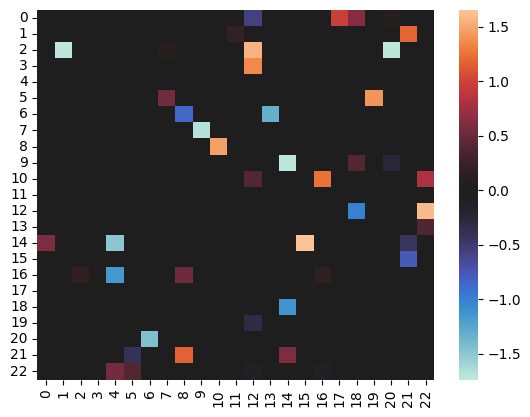

In [29]:
import seaborn as sns
sns.heatmap(esn.W_res, cmap='seismic', center = 0)

In [22]:
def train_on_signal(esn, signal,offset,shift,window_size, signal_len,display=False):
    X_train = get_signal(signal, offset, shift, window_size, signal_len)
    Y_train = get_signal(signal, offset, 0, window_size, signal_len)

    if display:
        plt.plot(X_train.flatten()[:1000],label='x')
        plt.plot(Y_train.flatten()[:1000],label='y')
        plt.legend()
        plt.show()
    
    esn.fit(X_train, Y_train)
    
def test_on_signal(esn, signal, offset, shift, window_size, signal_len, display = False):
    X_test = get_signal(signal, test_offset, shift, window_size, signal_len)
    Y_test = get_signal(signal, test_offset, 0, window_size, signal_len)
    
    Y_pred = esn.predict(X_test)
    
    if display:
        plt.plot(X_test.flatten()[:500],label='x')
        plt.plot(Y_test.flatten()[:500],label='y')
        plt.plot(Y_pred.flatten()[:500],label='y_pred')
        plt.ylim(-2,2)
        plt.legend()
        plt.show()
    
    return root_mean_squared_error(Y_pred.flatten(), Y_test.flatten()), Y_pred.flatten()

In [23]:
def get_gt(signal,offset,shift,window_size):
    X_train = get_signal(signal, offset, shift, window_size, len(signal))
    Y_train = get_signal(signal, offset, 0, window_size, len(signal))
    return X_train, Y_train

In [24]:
X_data = []
Y_data = []
for ecg in ecg_dataset:
    x_data, y_data = get_gt(ecg,0,12,2000)
    X_data.append(x_data)
    Y_data.append(y_data)

In [25]:
X_data = np.vstack(X_data).reshape(len(ecg_dataset),-1,1)
Y_data = np.vstack(Y_data).reshape(len(ecg_dataset),-1,1)

In [26]:
#ln = X_train.shape[0]
#index = list(range(ln))
#np.random.shuffle(index)
#train_index = index[:56]
#rest_index = index[56:]
#val_index = rest_index[:20]
#test_index = rest_index[20:]

In [27]:
#with open('train_index.npy', 'wb') as f:
#    np.save(f, train_index)
#    
#with open('val_index.npy', 'wb') as f:
#    np.save(f, val_index)
#    
#with open('test_index.npy', 'wb') as f:
#    np.save(f, test_index)


In [28]:
train_index = np.load('train_index.npy')
val_index = np.load('val_index.npy')
test_index = np.load('test_index.npy')

In [29]:
X_train = X_data[train_index]
Y_train = Y_data[train_index]

In [30]:
X_val = X_data[val_index]
Y_val = Y_data[val_index]

In [31]:
esn = EchoStateNetwork(n_input=1, n_reservoir=500, n_output=1, spectral_radius=1.25, sparsity=0.1, random_state=42)

In [32]:
%%time
esn.fit(X_train,Y_train)

CPU times: user 26.4 s, sys: 1min 22s, total: 1min 49s
Wall time: 4.87 s


In [33]:
res = esn.predict(X_val)

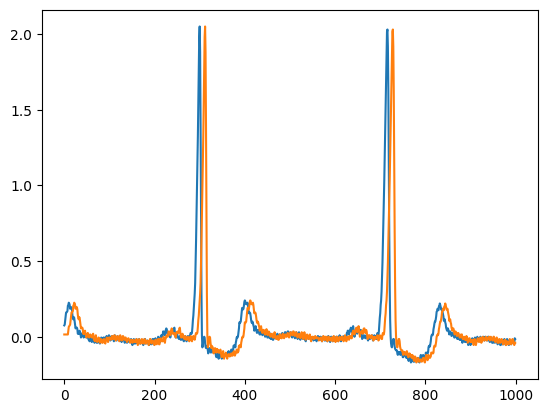

In [34]:
plt.plot(X_train[0][:1000].flatten())
plt.plot(Y_train[0][:1000].flatten())

In [35]:
dim1 = Y_val.shape[0]
dim2 = Y_val.shape[1]

In [36]:
root_mean_squared_error(Y_val.reshape(dim1,dim2),res.reshape(dim1,dim2))

0.06027724496204664

In [37]:
def mean_rmse(pred, ground_truth):
    total = 0
    for j,k in zip(pred,ground_truth):
        total += root_mean_squared_error(j.flatten(),k.flatten())
    return total/len(pred)

In [38]:
%%time
esn = EchoStateNetwork(n_input=1, n_reservoir=1000, n_output=1, spectral_radius=1.25, sparsity=0.1)
esn.fit(X_train,Y_train)
res = esn.predict(X_val)
print(mean_rmse(res,Y_val))

0.05637538058041256
CPU times: user 1min 27s, sys: 2min 46s, total: 4min 14s
Wall time: 11.2 s


In [39]:
%%time
esn = EchoStateNetwork(n_input=1, n_reservoir=64, n_output=1, spectral_radius=1, alpha = 0.35, sparsity=0.15)
esn.fit(X_train,Y_train)
res = esn.predict(X_val)
mean_rmse(res,Y_val)

CPU times: user 2.18 s, sys: 2.58 s, total: 4.77 s
Wall time: 1.76 s


0.05307289629593488

In [40]:
def create_ecg_dataset(ecg_dataset,shift,window_size,offset=0):
    X_data = []
    Y_data = []
    for ecg in ecg_dataset:
        x_data, y_data = get_gt(ecg,offset,shift,window_size)
        X_data.append(x_data)
        Y_data.append(y_data)
        
    X_data = np.vstack(X_data).reshape(len(ecg_dataset),-1,1)
    Y_data = np.vstack(Y_data).reshape(len(ecg_dataset),-1,1)
    
    train_index = np.load('train_index.npy')
    val_index = np.load('val_index.npy')
    test_index = np.load('test_index.npy')
    
    X_train = X_data[train_index]
    Y_train = Y_data[train_index]
    
    X_val = X_data[val_index]
    Y_val = Y_data[val_index]
    
    X_test = X_data[test_index]
    Y_test = Y_data[test_index]
    
    return X_train, Y_train, X_val, Y_val, X_test, Y_test

In [41]:
shift = 12
window_size = 2000
X_train, Y_train, X_val, Y_val, X_test, Y_test = create_ecg_dataset(ecg_dataset,shift, window_size)

In [42]:
def create_reservoirs(n_res_samples, n_reservoir, alpha, sparsity , spectral_radius):
    results = {'mean_rmse':[],'reservoir':[],'w_in':[]}

    for i in range(n_res_samples):
        esn = EchoStateNetwork(n_input=1, n_reservoir=n_reservoir, n_output=1, spectral_radius=spectral_radius, alpha = alpha, sparsity=sparsity)
        esn.fit(X_train,Y_train)
        res = esn.predict(X_val)
        score = mean_rmse(res,Y_val)
        results['mean_rmse'].append(score)
        results['reservoir'].append(esn.get_reservoir())
        results['w_in'].append(esn.get_w_in())
        
    return results

In [43]:
%%time
n_res_samples = 10
n_reservoir = 64
alpha = 0.35
sparsity = 0.15
spectral_radius = 1


results = {'mean_rmse':[],'reservoir':[]}

for i in range(n_res_samples):
    esn = EchoStateNetwork(n_input=1, n_reservoir=n_reservoir, n_output=1, spectral_radius=spectral_radius, alpha = alpha, sparsity=sparsity)
    esn.fit(X_train,Y_train)
    res = esn.predict(X_val)
    score = mean_rmse(res,Y_val)
    results['mean_rmse'].append(score)
    results['reservoir'].append(esn.get_reservoir())

CPU times: user 19.9 s, sys: 14 s, total: 33.9 s
Wall time: 17.5 s


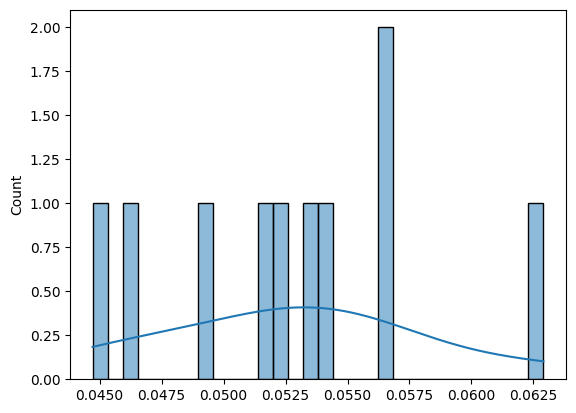

In [44]:
import seaborn as sns
sns.histplot(results['mean_rmse'], bins=30, kde=True )
plt.show()

In [45]:
%%time
n_res_samples = 10
n_reservoir = 32
alpha = 0.35
sparsity = 0.15
spectral_radius = 1

res2 = create_reservoirs( n_res_samples, n_reservoir, alpha, sparsity, spectral_radius )

CPU times: user 18 s, sys: 13.6 s, total: 31.6 s
Wall time: 15.7 s


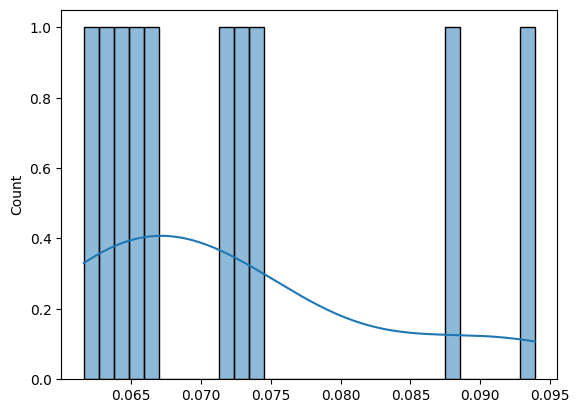

In [46]:
import seaborn as sns
sns.histplot(res2['mean_rmse'], bins=30, kde=True )
plt.show()

In [48]:
esn = EchoStateNetwork(n_input=1, n_reservoir=n_reservoir, n_output=1, spectral_radius=spectral_radius, alpha = alpha, sparsity=sparsity)
esn.set_reservoir(res2['reservoir'][4])
esn.set_w_in(res2['w_in'][4])
esn.fit(X_train,Y_train)
res = esn.predict(X_val)
score = mean_rmse(res,Y_val)
score

0.06502017480406314

In [49]:
res2['mean_rmse'][4]

0.06502017480406314

In [50]:
idx = np.argmax(res2['mean_rmse'])
res2['mean_rmse'][idx]

0.0938905019386882

In [51]:
# we have a dataset of stuff. its pbbly important to save it

In [52]:
import pickle
from datetime import datetime

In [53]:
date = datetime.today().strftime('%d-%H_%M_%S')
file_path = 'reservoir_data/'+date+'.pickle'

with open(file_path, 'wb') as file:
    # Serialize and write the variable to the file
    pickle.dump(res2, file)

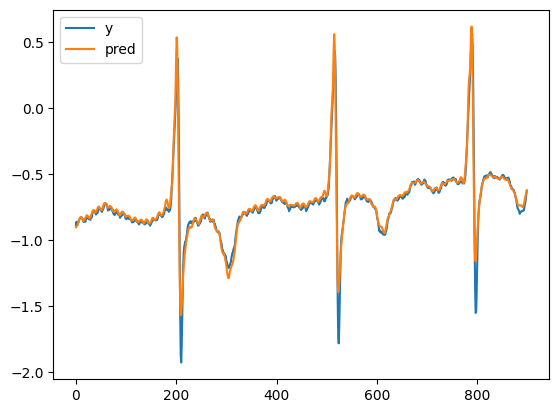

In [55]:
#plt.plot(X_val[0][:1000].flatten(),label='x')
plt.plot(Y_val[0][100:1500].flatten(),label='y')
plt.plot(res[0][100:1500].flatten(),label='pred')
plt.legend()
plt.savefig('images/Reservoir_Dataset/ESN_ecg_prediction_example.png')
plt.savefig('images/Reservoir_Dataset/ESN_ecg_prediction_example.svg')
plt.savefig('images/Reservoir_Dataset/ESN_ecg_prediction_example.pdf')

In [34]:
signal_len = 650_000
window_size = 100000
offset = 0
shift = 12

test_w_size = signal_len - window_size - 2*shift 
test_offset = window_size + shift

train_on_signal(ecg_dataset[0], offset, shift, window_size, signal_len)

TypeError: train_on_signal() missing 1 required positional argument: 'signal_len'

In [ ]:
test_on_signal(ecg_dataset[0][window_size+shift:], offset, shift, window_size, signal_len)

In [35]:
from collections import defaultdict

In [42]:
def test_all(esn, datasets, offset, shift, window_size, signal_len):
    results = defaultdict(lambda: ([], []))
    for k in datasets:
        print(k)
        for i, datapoint in enumerate(datasets[k]):
            train_on_signal(esn, datapoint, offset, shift, window_size, signal_len)
            rmse, y_pred = test_on_signal(esn, datapoint, offset, shift, window_size, signal_len)
            results[k][0].append(rmse)
            results[k][1].append(y_pred)
            
    return results

In [43]:
signal_len = 650_000
window_size = 10000
offset = 0
shift = 12

df_results = pd.DataFrame(columns=datasets.keys())

In [44]:
%%time 
res = test_all(esn, datasets, offset, shift, window_size, signal_len)
res

sine
square
triangle
sawtooth
ecg
mackey_glass
CPU times: user 9min 27s, sys: 36min 41s, total: 46min 9s
Wall time: 1min 55s


defaultdict(<function __main__.test_all.<locals>.<lambda>()>,
            {'sine': ([0.013393216235749955,
               0.05457472792690878,
               0.07462275377415524,
               0.039654629554041504,
               0.028113556598944076,
               0.03607468332276792,
               0.015513637886988646,
               0.07734014269142463,
               0.07157848626229396,
               0.02773719640921123,
               0.025667423925486908,
               0.016809741606705866,
               0.032333606897551104,
               0.05253360156107684,
               0.04303466144440107,
               0.018672297732501127,
               0.021730318004775862,
               0.0007973870070695006,
               0.04937588926429892,
               0.06237073960612975,
               0.03796790215548784,
               0.014638678523986265,
               0.012336925527409033,
               0.014117603073816909,
               0.04177976242220866,
               0

In [53]:
res.keys()

dict_keys(['sine', 'square', 'triangle', 'sawtooth', 'ecg', 'mackey_glass'])

0


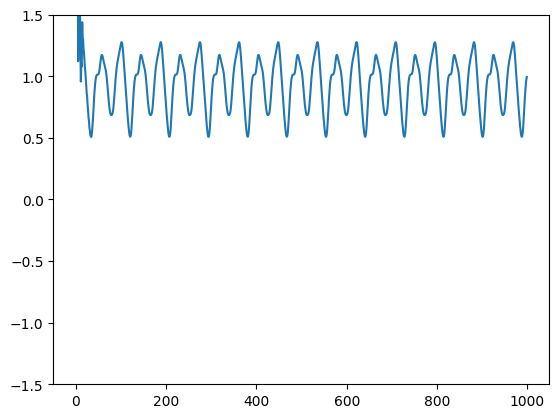

1


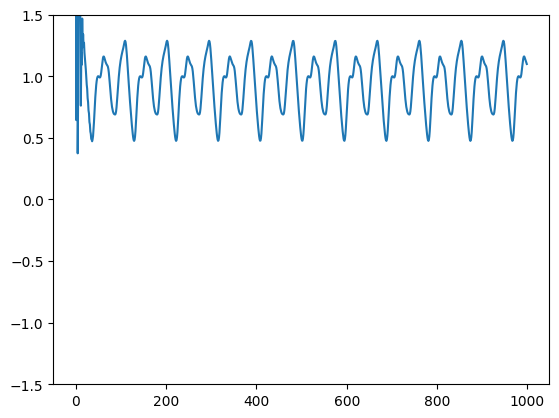

2


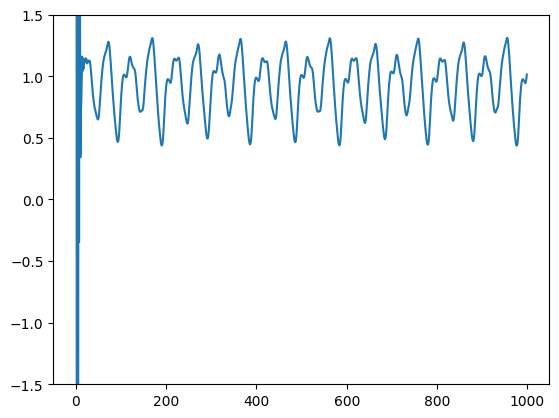

3


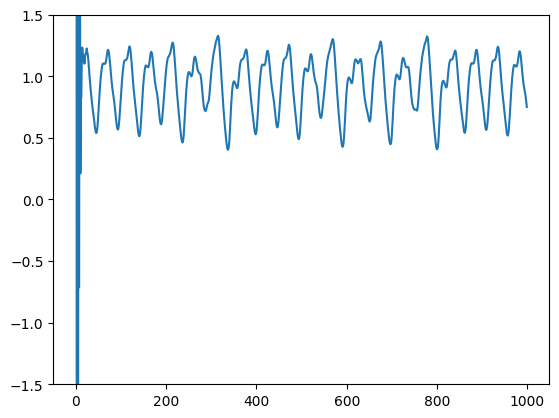

4


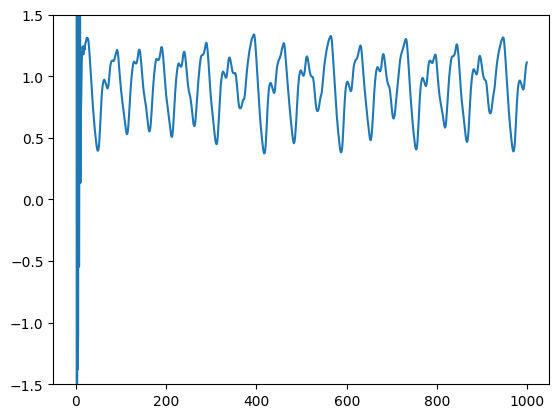

5


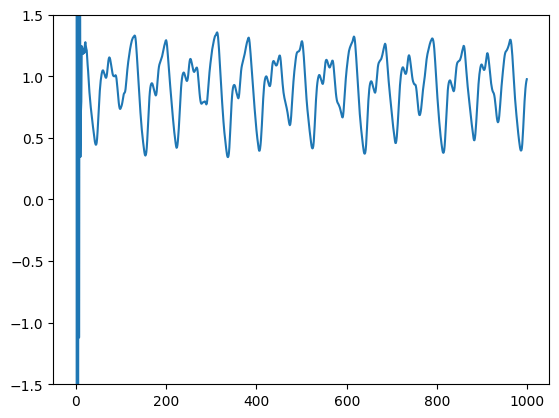

6


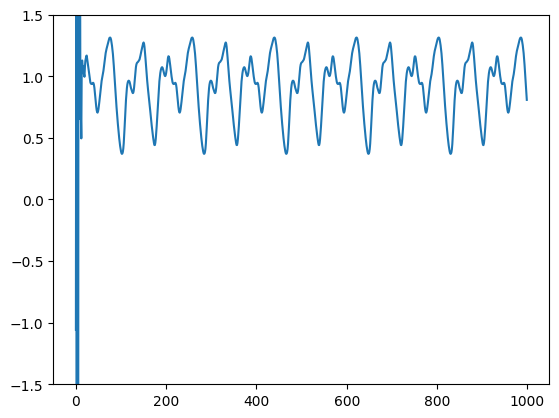

7


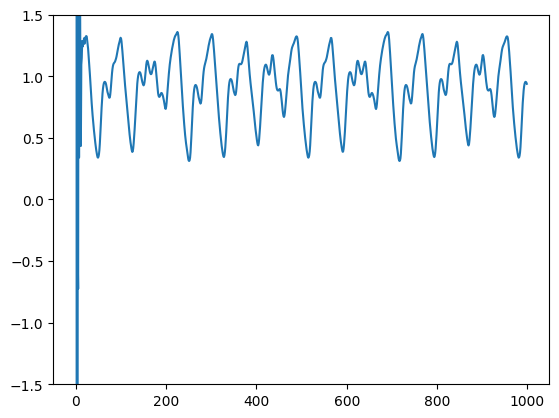

In [58]:
for i, sine in enumerate(res['mackey_glass'][1]):
    print(i)
    plt.plot(sine[:1000])
    plt.ylim(-1.5,1.5)
    plt.show()

In [61]:
mackey_glass_dataset

[array([[1.2       ],
        [1.13549691],
        [1.05735972],
        ...,
        [0.5077524 ],
        [0.51609703],
        [0.54268421]]),
 array([[1.2       ],
        [1.13549691],
        [1.05735972],
        ...,
        [0.70803874],
        [0.69924702],
        [0.69320541]]),
 array([[1.2       ],
        [1.13549691],
        [1.05735972],
        ...,
        [0.72567884],
        [0.7175017 ],
        [0.71384273]]),
 array([[1.2       ],
        [1.13549691],
        [1.05735972],
        ...,
        [0.58022248],
        [0.6419505 ],
        [0.70996099]]),
 array([[1.2       ],
        [1.13549691],
        [1.05735972],
        ...,
        [1.29313567],
        [1.30749826],
        [1.31861227]]),
 array([[1.2       ],
        [1.13549691],
        [1.05735972],
        ...,
        [1.04326283],
        [1.08148027],
        [1.11500984]]),
 array([[1.2       ],
        [1.13549691],
        [1.05735972],
        ...,
        [1.28683868],
        [1.301876

In [ ]:
# choose the number of reservoirs which will be flat for the most part then 

In [ ]:
esn = EchoStateNetwork(n_input=1, n_reservoir=23, n_output=1, spectral_radius=1.25, sparsity=0.1)#, random_state=42)

In [ ]:
#fit sine and evaluate it
#fit square and evaluate it
#fit triangle and evaluate it
#fit sawtooth and evaluate it

In [ ]:
n_models = 1000
n_reservoir = 23
n_output=1
n_input=1
spectral_radius = 1.25
sparsity=0.1
for i in range(n_models):
    esn = EchoStateNetwork(n_input=n_input, n_reservoir=n_reservoir, n_output=n_output, spectral_radius=spectral_radius, sparsity=sparsity)#, random_state=42)

In [ ]:
len(ecg_dataset)

In [ ]:
#randomly select one and test it on the rest of the dataset

In [ ]:
# 1. sine manipulate frequency and phase shift 
# 2. do the same for the rest of the periodic signals
# 3. lastly what to do for the mackey glass

In [ ]:
# 1. step
#   generate the functions with taus from 14 to 21 do it for the same numer of timesteps as is in the ecg dataset
# 2. step
#   for every signal (22-14) for this case train the model on first window and 
#   then test it on n additional windows from the same signal